In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
file1 ='C:/Users/master/economy.csv'
house = pd.read_csv(file1)
print(house.columns)
house.head()

Index(['tradeprice_sido_n1', 'date', 'region_cd', 'tradeprice_sido', 'year',
       'month', 'building_type', 'construction_realized_amount', 'cd',
       'spirit_deposit_rate', 'exchange_rate', 'composite_stock_price_index',
       'economy_growth', 'exchequer_bond_three', 'household_loan_all',
       'mortgage_all', 'numberofnosells', 'unsalenum_c'],
      dtype='object')


,tradeprice_sido_n1,date,region_cd,tradeprice_sido,year,month,building_type,construction_realized_amount,cd,spirit_deposit_rate,exchange_rate,composite_stock_price_index,economy_growth,exchequer_bond_three,household_loan_all,mortgage_all,numberofnosells,unsalenum_c
0,69.5,2006-01-01,48000,69.4,2006,1,0,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
1,64.6,2006-01-01,48000,64.5,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
2,69.7,2006-01-01,47000,69.3,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
3,94.2,2006-01-01,45000,94.2,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
4,80.0,2006-01-01,48000,80.0,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN


In [3]:
house

,tradeprice_sido_n1,date,region_cd,tradeprice_sido,year,month,building_type,construction_realized_amount,cd,spirit_deposit_rate,exchange_rate,composite_stock_price_index,economy_growth,exchequer_bond_three,household_loan_all,mortgage_all,numberofnosells,unsalenum_c
0,69.5,2006-01-01,48000,69.4,2006,1,0,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
1,64.6,2006-01-01,48000,64.5,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
2,69.7,2006-01-01,47000,69.3,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
3,94.2,2006-01-01,45000,94.2,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
4,80.0,2006-01-01,48000,80.0,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,94.4,2018-10-01,43000,94.9,2018,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,44.0
10140,97.7,2018-10-01,43000,97.9,2018,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,44.0
10141,102.8,2018-10-01,43000,102.4,2018,10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,44.0
10142,101.0,2018-10-01,36000,100.9,2018,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(house, test_size=0.2)

In [5]:
train_X = train[[ 'region_cd', 'tradeprice_sido', 'year',
       'month', 'building_type']]
train_Y = train[['tradeprice_sido_n1']]


In [6]:
test_X = test[[ 'region_cd', 'tradeprice_sido', 'year',
       'month', 'building_type']]
test_Y = test[['tradeprice_sido_n1']]

In [7]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std


In [12]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 52)                312       
_________________________________________________________________
dense_12 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_13 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 27        
Total params: 3,446
Trainable params: 3,446
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
191/191 [==============================] - 0s 1ms/step - loss: 0.2226 - val_loss: 0.0113
Epoch 2/25
191/191 [==============================] - 0s 780us/step - loss: 0.0049 - val_loss: 0.0050
Epoch 3/25
191/191 [==============================] - 0s 800us/step - loss: 0.0041 - val_loss: 0.0027
Epoch 4/25
191/191 [==============================] - 0s 734us/step - loss: 0.0097 - val_loss: 0.0071
Epoch 5/25
191/191 [==============================] - 0s 711us/step - loss: 0.0049 - val_loss: 0.0222
Epoch 6/25
191/191 [==============================] - 0s 735us/step - loss: 0.0037 - val_loss: 0.0068
Epoch 7/25
191/191 [==============================] - 0s 737us/step - loss: 0.0043 - val_loss: 0.0025
Epoch 8/25
191/191 [==============================] - 0s 730us/step - loss: 0.0038 - val_loss: 0.0044
Epoch 9/25
191/191 [==============================] - 0s 734us/step - loss: 0.0043 - val_loss: 0.0052
Epoch 10/25
191/191 [==============================] - 0s 778us/step - loss: 0.0084 

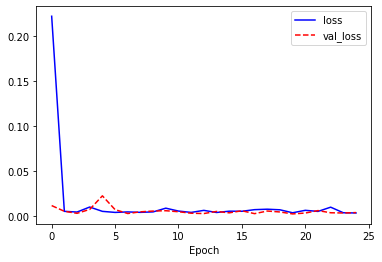

In [14]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_X, test_Y)


64/64 [==============================] - 0s 499us/step - loss: 0.0041


0.00405930494889617

<ipython-input-16-eb31e7e3c279>:8: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
<ipython-input-16-eb31e7e3c279>:8: UserWarning: Attempting to set identical bottom == top == [0.] results in singular transformations; automatically expanding.
  plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])


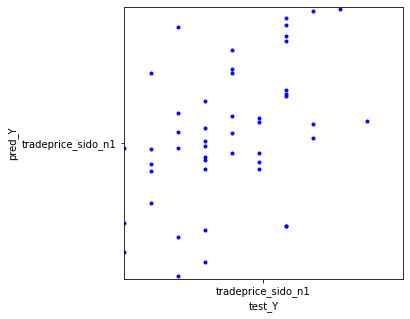

In [16]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [17]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25)

Epoch 1/50
191/191 [==============================] - 0s 1ms/step - loss: 0.0773 - val_loss: 0.0027
Epoch 2/50
191/191 [==============================] - 0s 733us/step - loss: 0.0124 - val_loss: 0.0756
Epoch 3/50
191/191 [==============================] - 0s 838us/step - loss: 0.0064 - val_loss: 0.0041
Epoch 4/50
191/191 [==============================] - 0s 856us/step - loss: 0.0035 - val_loss: 0.0074
Epoch 5/50
191/191 [==============================] - 0s 764us/step - loss: 0.0067 - val_loss: 0.0242
Epoch 6/50
191/191 [==============================] - 0s 724us/step - loss: 0.0061 - val_loss: 0.0028
Epoch 7/50
191/191 [==============================] - 0s 791us/step - loss: 0.0036 - val_loss: 0.0024
Epoch 8/50
191/191 [==============================] - 0s 783us/step - loss: 0.0048 - val_loss: 0.0057
Epoch 9/50
191/191 [==============================] - 0s 727us/step - loss: 0.0175 - val_loss: 0.0045
Epoch 10/50
191/191 [==============================] - 0s 727us/step - loss: 0.0070 

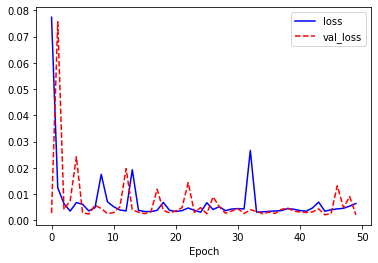

In [18]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<ipython-input-19-065f12d93420>:8: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
<ipython-input-19-065f12d93420>:8: UserWarning: Attempting to set identical bottom == top == [0.] results in singular transformations; automatically expanding.
  plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])


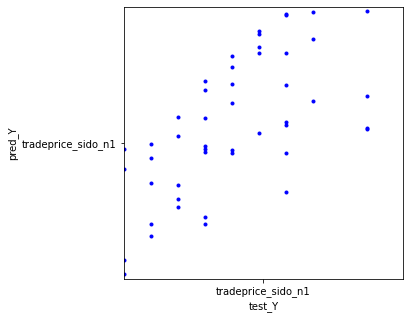

In [19]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()